In [1]:
# Import Necessary Libraries and Data
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Read the given CSV file
df = pd.read_csv("C:/Users/Naina-pc/Downloads/letters.csv")

#View few records of the dataset
df.head()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0


In [2]:
# Check for null values
df.isnull()

# Check for null values column by column
null_columns = df.columns[df.isnull().any()]
for column in null_columns:
    print(f"Column '{column}' has null values.")

In [3]:
# Calculate the percentage of 'null' data in each column
for column in df.columns:
    null_count = df[column].isnull().sum()
    total_count = len(df[column])
    percentage = (null_count / total_count) * 100
    print(f"Column '{column}': {percentage:.3f}% of null data.")

Column 'label': 0.000% of null data.
Column 'pixel43': 0.000% of null data.
Column 'pixel44': 0.000% of null data.
Column 'pixel92': 0.000% of null data.
Column 'pixel124': 0.000% of null data.
Column 'pixel125': 0.000% of null data.
Column 'pixel126': 0.000% of null data.
Column 'pixel127': 0.000% of null data.
Column 'pixel128': 0.000% of null data.
Column 'pixel129': 0.000% of null data.
Column 'pixel130': 0.000% of null data.
Column 'pixel131': 0.000% of null data.
Column 'pixel132': 0.000% of null data.
Column 'pixel133': 0.000% of null data.
Column 'pixel134': 0.000% of null data.
Column 'pixel135': 0.000% of null data.
Column 'pixel136': 0.000% of null data.
Column 'pixel137': 0.000% of null data.
Column 'pixel138': 0.000% of null data.
Column 'pixel146': 0.000% of null data.
Column 'pixel147': 0.000% of null data.
Column 'pixel148': 0.000% of null data.
Column 'pixel149': 0.000% of null data.
Column 'pixel150': 0.000% of null data.
Column 'pixel151': 0.000% of null data.
Column

# KNN

In [4]:
#Model 1:

X = df.loc[:, df.columns != 'label']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33600 entries, 5947 to 12825
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pixel43   33600 non-null  int64
 1   pixel44   33600 non-null  int64
 2   pixel92   33600 non-null  int64
 3   pixel124  33600 non-null  int64
 4   pixel125  33600 non-null  int64
 5   pixel126  33600 non-null  int64
 6   pixel127  33600 non-null  int64
 7   pixel128  33600 non-null  int64
 8   pixel129  33600 non-null  int64
 9   pixel130  33600 non-null  int64
 10  pixel131  33600 non-null  int64
 11  pixel132  33600 non-null  int64
 12  pixel133  33600 non-null  int64
 13  pixel134  33600 non-null  int64
 14  pixel135  33600 non-null  int64
 15  pixel136  33600 non-null  int64
 16  pixel137  33600 non-null  int64
 17  pixel138  33600 non-null  int64
 18  pixel146  33600 non-null  int64
 19  pixel147  33600 non-null  int64
 20  pixel148  33600 non-null  int64
 21  pixel149  33600 non-null  int64


In [5]:
import math
k= math.sqrt(33600)
print(k)

183.3030277982336


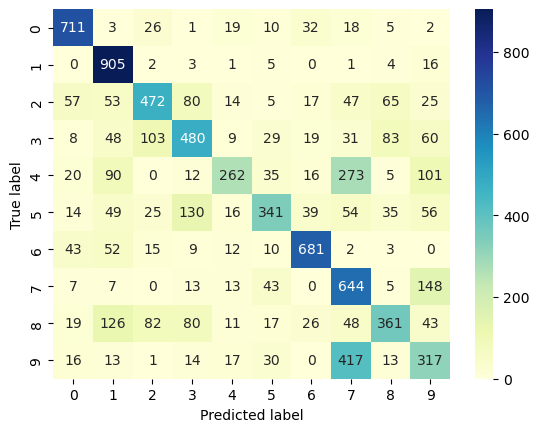


 Accuracy of this Model is :  0.6159523809523809
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       827
           1       0.67      0.97      0.79       937
           2       0.65      0.57      0.60       835
           3       0.58      0.55      0.57       870
           4       0.70      0.32      0.44       814
           5       0.65      0.45      0.53       759
           6       0.82      0.82      0.82       827
           7       0.42      0.73      0.53       880
           8       0.62      0.44      0.52       813
           9       0.41      0.38      0.39       838

    accuracy                           0.62      8400
   macro avg       0.63      0.61      0.60      8400
weighted avg       0.63      0.62      0.61      8400



In [6]:

classifier = KNeighborsClassifier(n_neighbors=183, metric='euclidean')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#accuracy
accuracy = classifier.score(X_test, y_test)
print("\n Accuracy of this Model is : ", accuracy)

#KNN classification report
print(classification_report(y_test,y_pred))

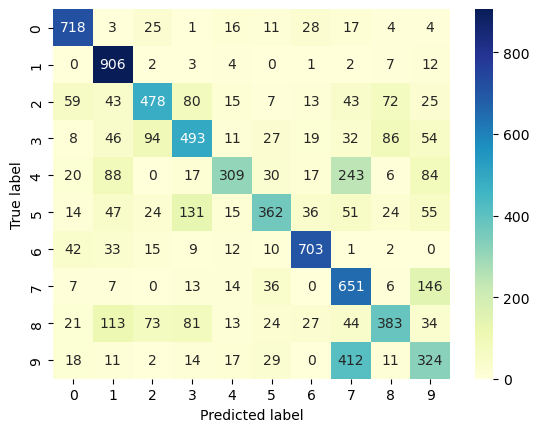


 Accuracy of this Model is :  0.6341666666666667
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       827
           1       0.70      0.97      0.81       937
           2       0.67      0.57      0.62       835
           3       0.59      0.57      0.58       870
           4       0.73      0.38      0.50       814
           5       0.68      0.48      0.56       759
           6       0.83      0.85      0.84       827
           7       0.44      0.74      0.55       880
           8       0.64      0.47      0.54       813
           9       0.44      0.39      0.41       838

    accuracy                           0.63      8400
   macro avg       0.65      0.63      0.62      8400
weighted avg       0.65      0.63      0.63      8400



In [7]:
#model 2:

classifier = KNeighborsClassifier(n_neighbors=101, metric='euclidean')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#accuracy
accuracy = classifier.score(X_test, y_test)
print("\n Accuracy of this Model is : ", accuracy)

#KNN classification report
print(classification_report(y_test,y_pred))

# Random Forest Model 

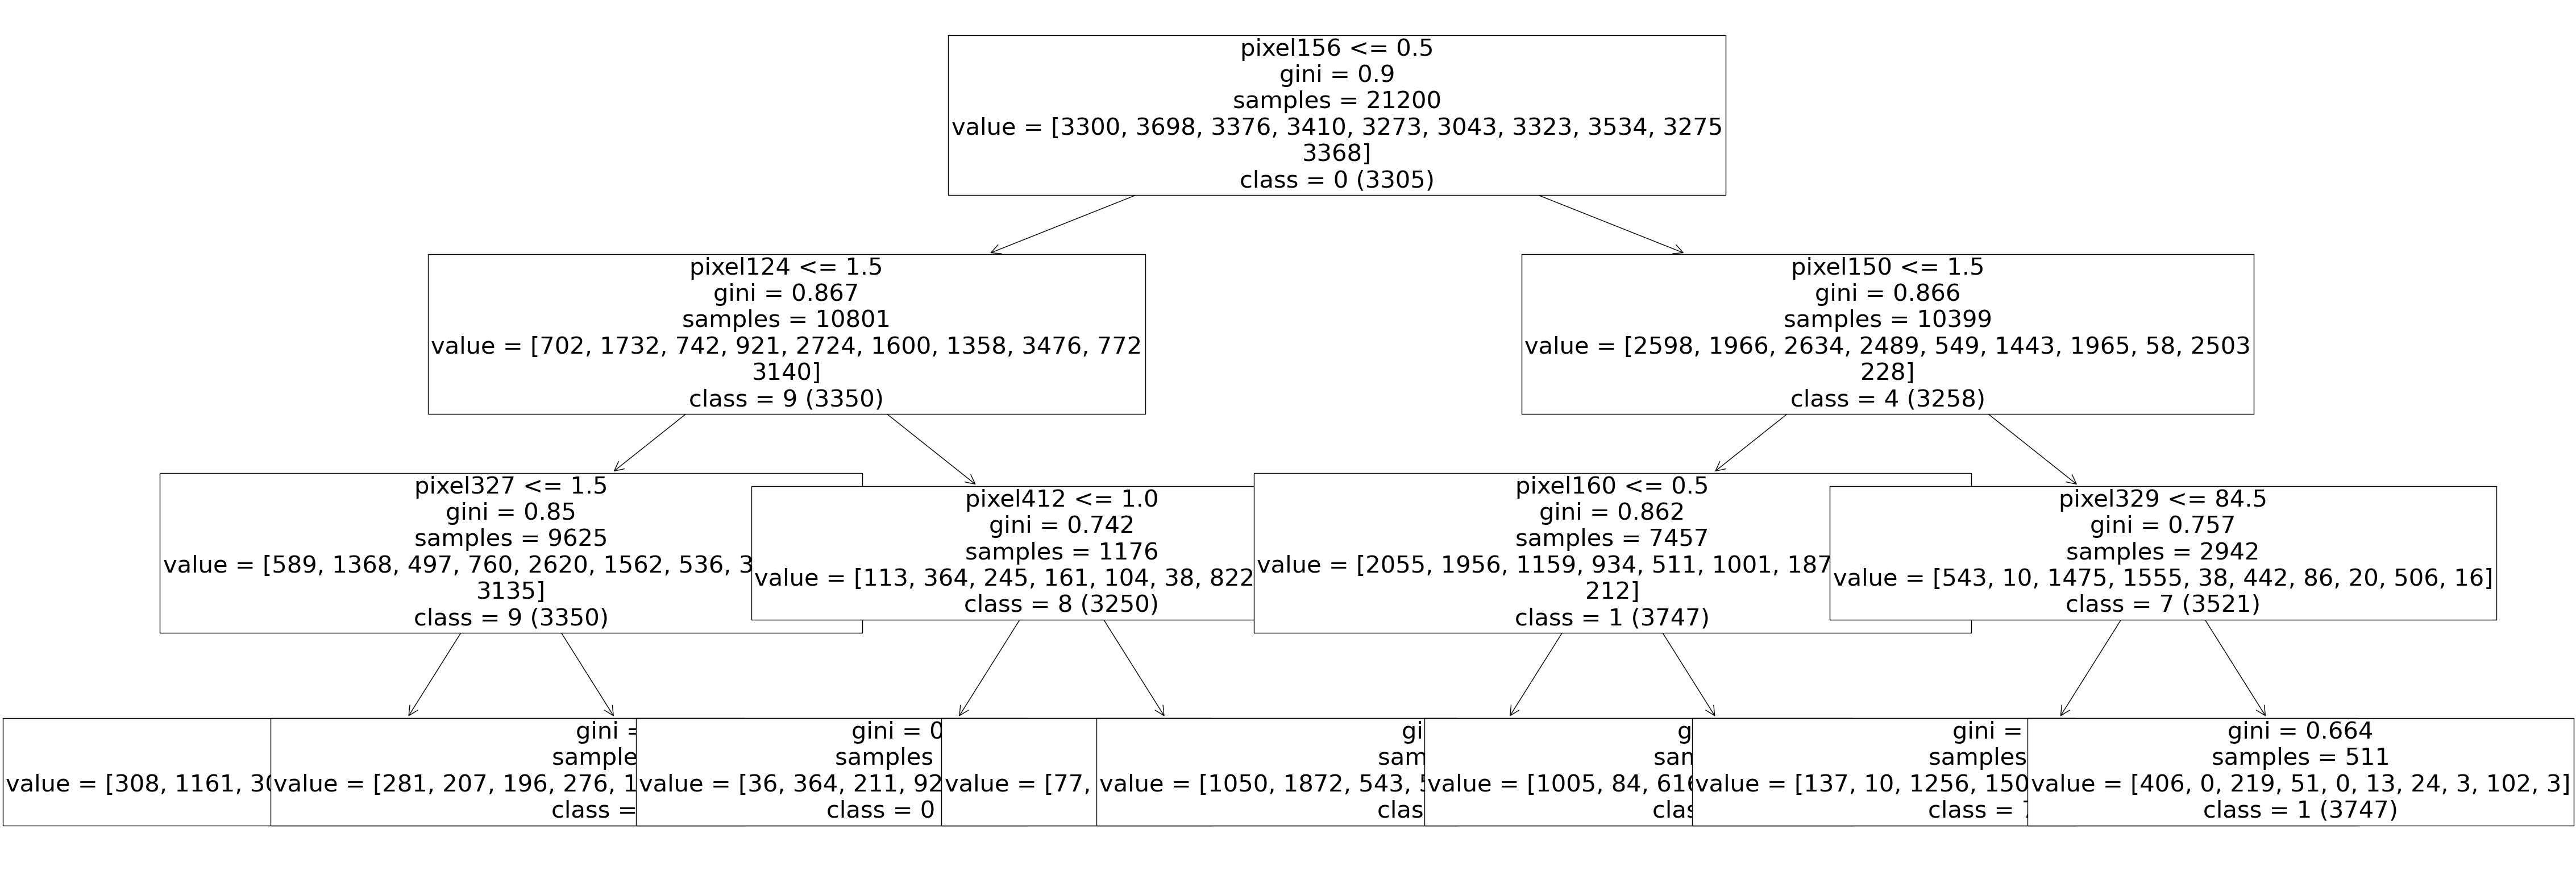

In [8]:
#model 1:

target = 'label'

# Combine numerical and categorical encoded features
X = df.drop(['label'], axis=1)
y = df['label']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creating and fitting the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=3, random_state=0)
random_forest.fit(X_train, y_train)
# Choose a tree from the forest to plot (e.g., the first tree)
tree_to_plot = random_forest.estimators_[0]
# Get the unique target class values
class_values = y.unique()

plt.figure(figsize=(50, 20))
plot_tree(tree_to_plot, feature_names=X_train.columns,class_names=[f'{class_value} ({y_train.value_counts()[class_value]})' for class_value in class_values], fontsize=30)
plt.show()

# Predicting on the test set
y_pred = random_forest.predict(X_test)

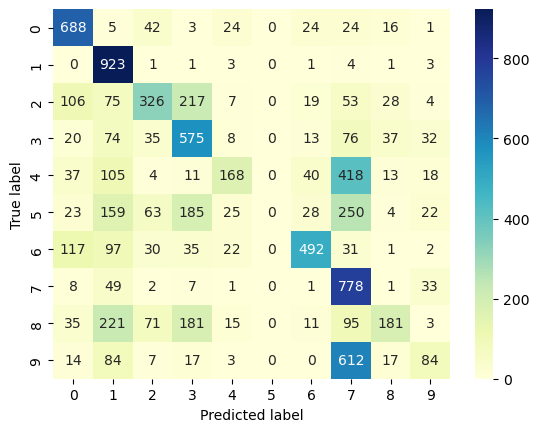

In [9]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [10]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy of this Model is : ", accuracy)


 Accuracy of this Model is :  0.5017857142857143


In [11]:
# Generating the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.83      0.73       827
           1       0.52      0.99      0.68       937
           2       0.56      0.39      0.46       835
           3       0.47      0.66      0.55       870
           4       0.61      0.21      0.31       814
           5       0.00      0.00      0.00       759
           6       0.78      0.59      0.68       827
           7       0.33      0.88      0.48       880
           8       0.61      0.22      0.33       813
           9       0.42      0.10      0.16       838

    accuracy                           0.50      8400
   macro avg       0.49      0.49      0.44      8400
weighted avg       0.50      0.50      0.44      8400



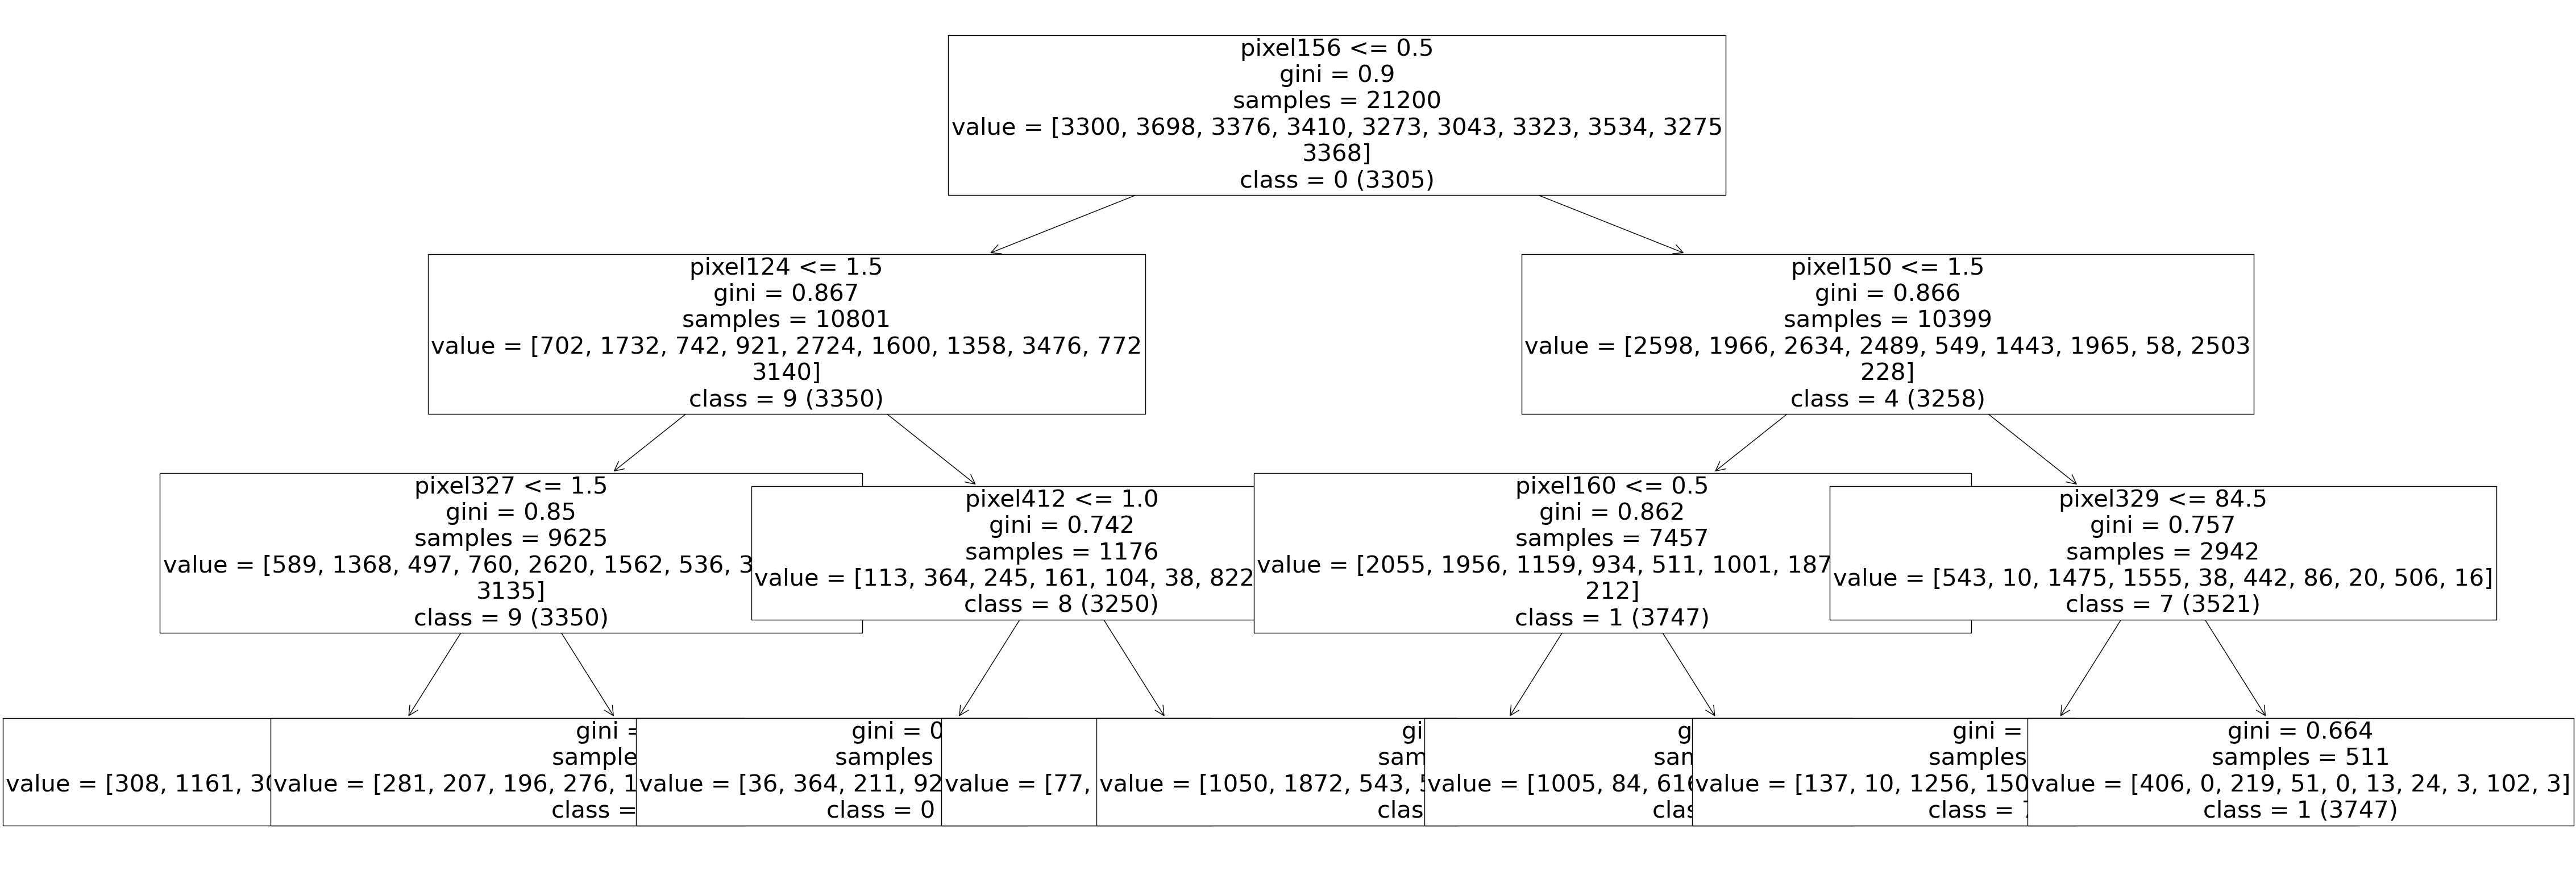

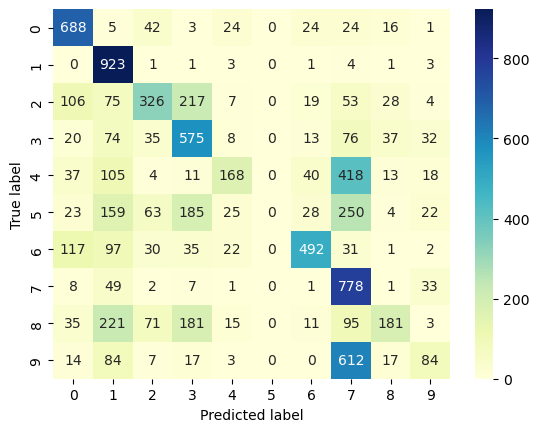


 Accuracy of this Model is :  0.5017857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.83      0.73       827
           1       0.52      0.99      0.68       937
           2       0.56      0.39      0.46       835
           3       0.47      0.66      0.55       870
           4       0.61      0.21      0.31       814
           5       0.00      0.00      0.00       759
           6       0.78      0.59      0.68       827
           7       0.33      0.88      0.48       880
           8       0.61      0.22      0.33       813
           9       0.42      0.10      0.16       838

    accuracy                           0.50      8400
   macro avg       0.49      0.49      0.44      8400
weighted avg       0.50      0.50      0.44      8400



In [12]:
#model 2:
target = 'label'

# Combine numerical and categorical encoded features
X = df.drop(['label'], axis=1)
y = df['label']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creating and fitting the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=3, random_state=0)
random_forest.fit(X_train, y_train)
# Choose a tree from the forest to plot (e.g., the first tree)
tree_to_plot = random_forest.estimators_[0]
# Get the unique target class values
class_values = y.unique()

plt.figure(figsize=(50, 20))
plot_tree(tree_to_plot, feature_names=X_train.columns,class_names=[f'{class_value} ({y_train.value_counts()[class_value]})' for class_value in class_values], fontsize=30)
plt.show()

# Predicting on the test set
y_pred = random_forest.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy of this Model is : ", accuracy)

# Generating the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Neural Network

In [13]:

import tensorflow as tf

X = df.drop(['label'], axis=1)
y = df['label']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8,input_shape=(4,), activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=20)
model.evaluate(X_test, y_test)

ModuleNotFoundError: No module named 'tensorflow'